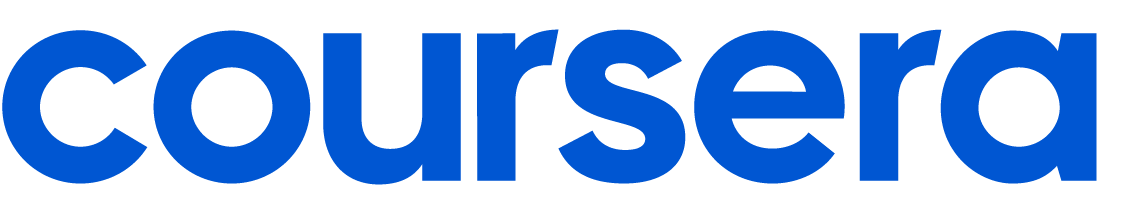

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [247]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [248]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [249]:
# Import any other packages you may want to use
from pandas.api.types import is_numeric_dtype
#from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers

# For rounding up
import math

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [250]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [251]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()


test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [252]:
# Checking type of data and null values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [253]:
# Exploring preliminar statistics data

data_copy = train_df.copy()
data_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [254]:
# Cross Validation

Y_train = train_df[['Default']].values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(train_df, Y_train, test_size=0.2, random_state = 101)



<Axes: xlabel='Default', ylabel='count'>

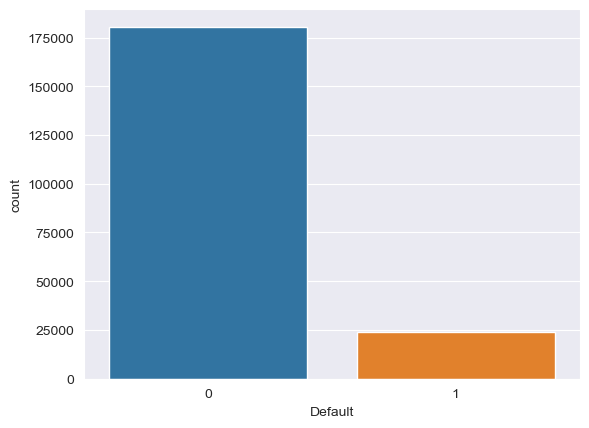

In [255]:
# Visualizing data

sns.set_style('darkgrid')
sns.countplot(x='Default', data=X_train)

 there is an unbalance in the data, so will proceeed with undersampling because using oversampling didn't mark such a big difference in the analisis and has more computacional proccess

## Preprocessing data for oversampling

# Undersampling data

In [256]:
count_class_0, count_class_1 = X_train['Default'].value_counts()
df_0 = X_train[X_train['Default'] == 0]
df_1 = X_train[X_train['Default'] == 1]
df_0_under = df_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_1, df_0_under], axis=0)
print('Random over-sampling:')
print(df_test_over['Default'].value_counts())

Random over-sampling:
Default
1    23739
0    23739
Name: count, dtype: int64


# Oversampling data

count_class_0, count_class_1 = X_train['Default'].value_counts()
df_0 = X_train[X_train['Default'] == 0]
df_1 = X_train[X_train['Default'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['Default'].value_counts())

In [257]:
y_train = np.array(df_test_over['Default'])

y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Analizing Data to select variables

In [258]:
# Defining visualization for numerical and objects
            
def ploting_obj_visualization(data, columns, target):
    if len(columns) > 0:
        num_plots = len(columns)
        fig, axs = plt.subplots(num_plots, 1, figsize=(11, 7 * num_plots))
        for i, n in enumerate(columns):
            plt.sca(axs[i])
            sns.countplot(x=n, hue=target, data=data, palette='Set1')

def plot_numeric_distributions(df, num_cols, target):
    """
    Plot histograms for numeric columns to visualize their distribution.
    """
    fig, axes = plt.subplots(nrows=math.ceil(len(num_cols)/3), ncols=3, figsize=(12, 8))
    axes = axes.flat

    for i, col in enumerate(num_cols):
        sns.histplot(df, hue=target, x=col, stat="count", kde=True, line_kws={"linewidth": 2.0},
                     alpha=0.4, color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], ax=axes[i])
        sns.rugplot(df, hue=target,x=col, color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], ax=axes[i])
        axes[i].set_title(f"{col}", fontsize=10, fontweight="bold", color="darkred")

    plt.tight_layout()
    plt.show()

<Axes: xlabel='Default', ylabel='count'>

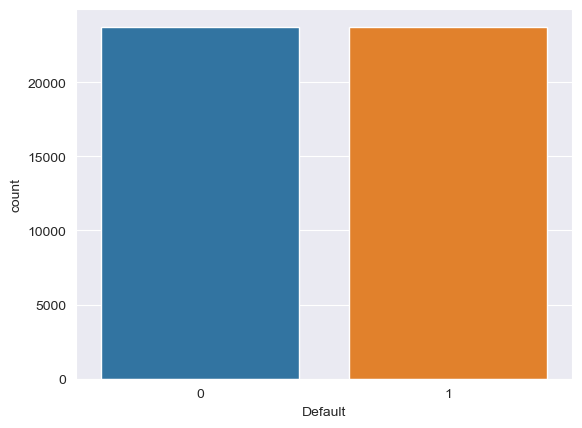

In [259]:
# Checking new data balanced

sns.set_style('darkgrid')
sns.countplot(x='Default', data=df_test_over)


['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


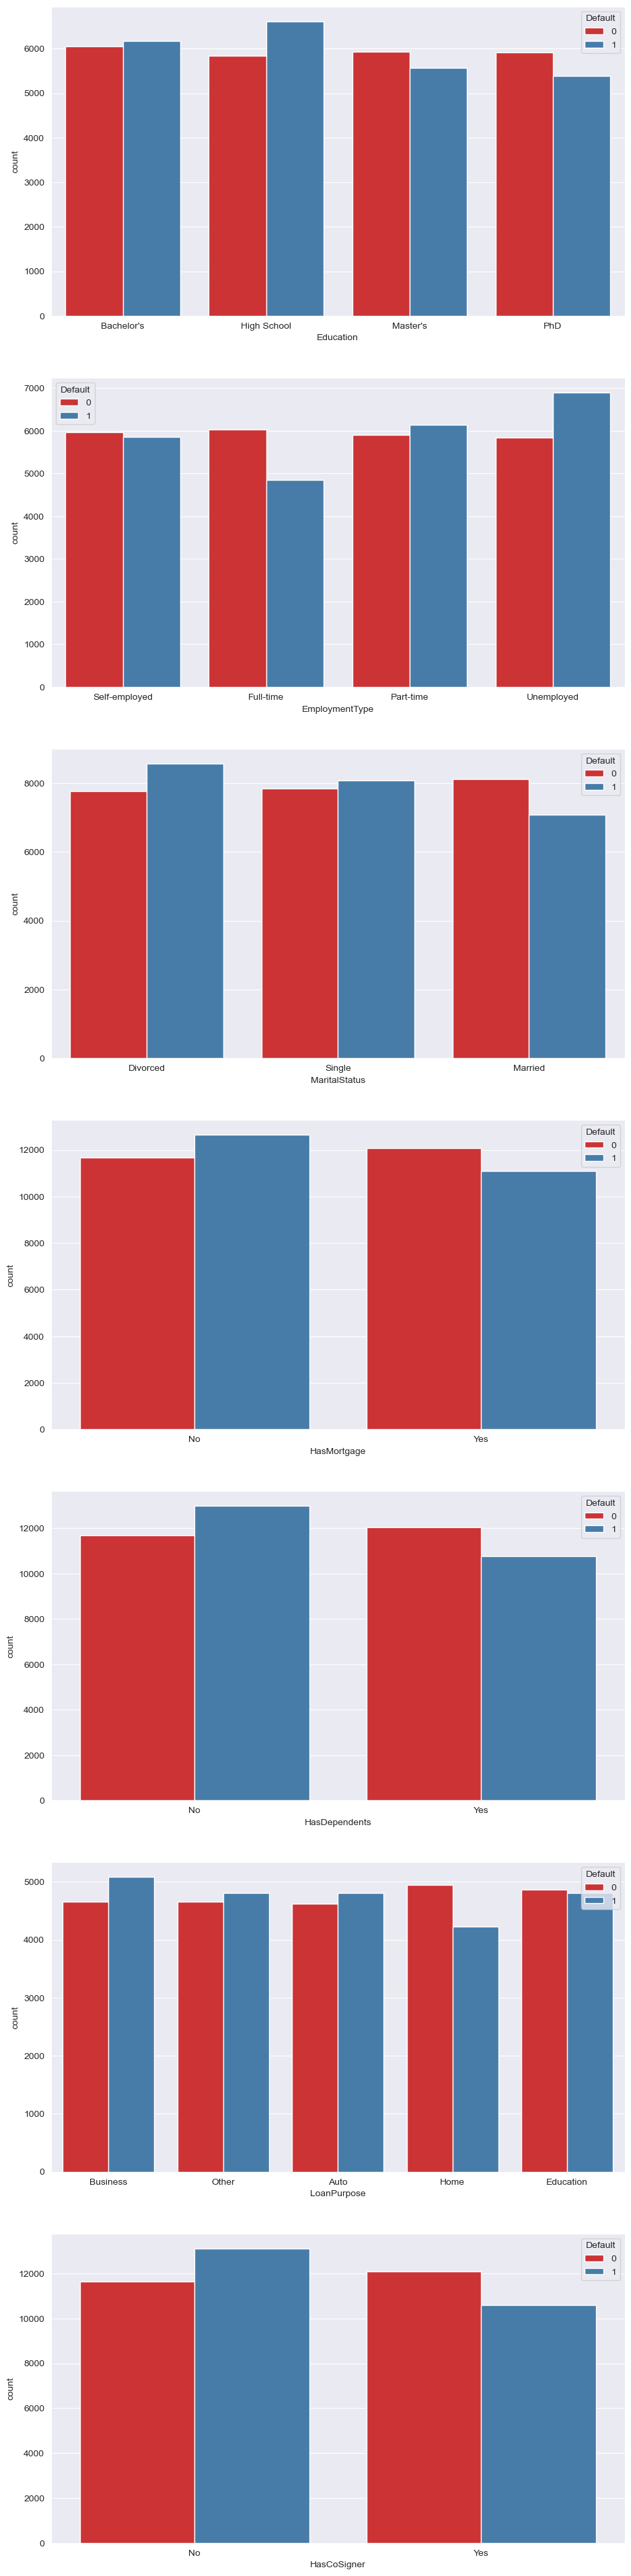

In [260]:
# Separating Numerics from Objects
numerics_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
headers_data = list(df_test_over.columns)
headers_obj = []
headers_num = []
for head_i in headers_data:
    if df_test_over[head_i].dtype not in numerics_types:
        headers_obj.append(head_i)
    else:
        headers_num.append(head_i)

print(headers_obj)

# Dropping LoanID
headers_obj.pop(0)
 
# Plotting Object visualization
ploting_obj_visualization(df_test_over, headers_obj, 'Default')



# Numerical Data Analysis

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']


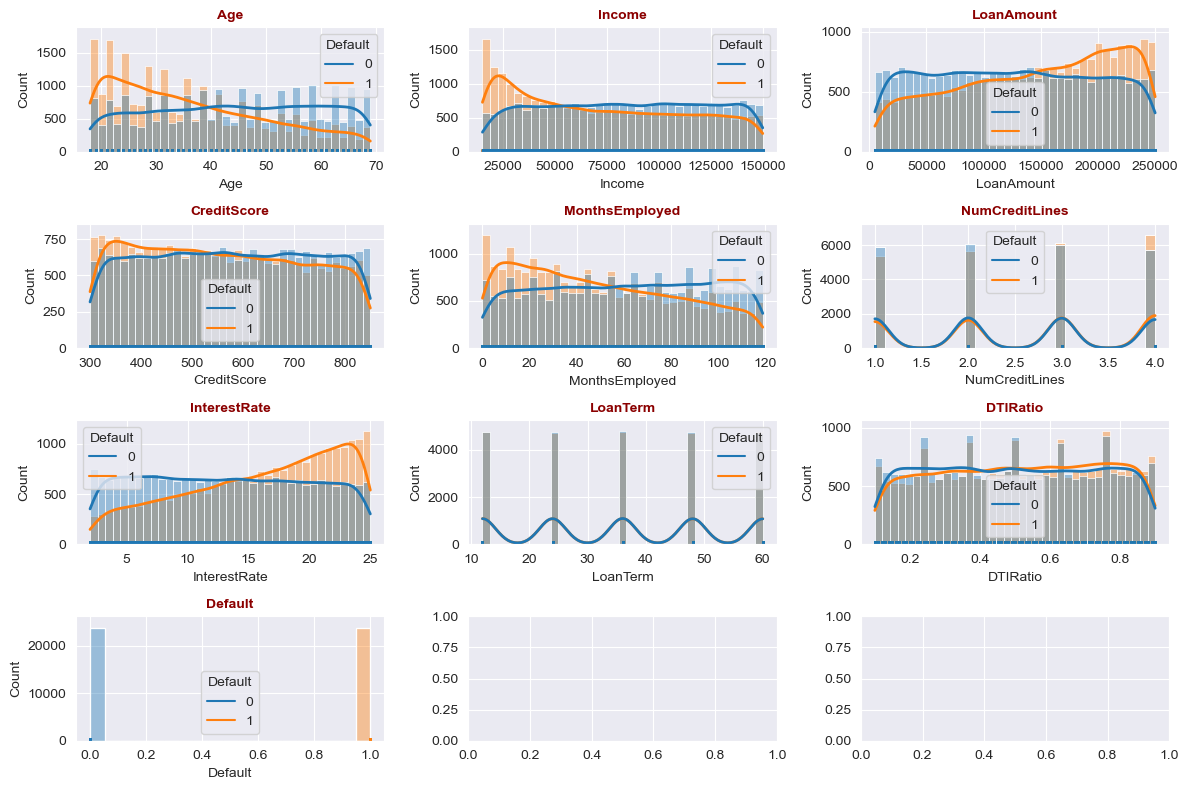

In [261]:
print(headers_num)
#headers_num.pop(9)
plot_numeric_distributions(df_test_over, headers_num, 'Default')

## Processing data for the Training

In [262]:
# Setting dropping values for the data
#droping = ['LoanID', 'Default', 'LoanTerm', 'Education', 'MaritalStatus', 'Age', 'DTIRatio', 'EmploymentType']

# According with my data analysis I choosed this data to be dropped and 
# continue with the more significant data in this project for the training
droping = ['LoanID', 'Default', 'DTIRatio', 'LoanTerm', 'NumCreditLines', 'Education', 'HasMortgage']

In [263]:
# Converting Object data to float with categorization

final_data = df_test_over.copy()
final_data.drop( droping, axis=1, inplace = True)
X_test.drop(droping, axis=1, inplace = True)
column_headers = list(final_data.columns)
for title in column_headers:
    if final_data[title].dtype not in ['int64', 'float64']:
        print(title)
        final_data = pd.get_dummies(final_data, columns=[title],drop_first=True)
        X_test = pd.get_dummies(X_test, columns=[title],drop_first=True)
final_data = (final_data).astype('float64')
X_test = (X_test).astype('float64')
final_data.info()
X_test.info()

EmploymentType
MaritalStatus
HasDependents
LoanPurpose
HasCoSigner
<class 'pandas.core.frame.DataFrame'>
Index: 47478 entries, 51438 to 21981
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           47478 non-null  float64
 1   Income                        47478 non-null  float64
 2   LoanAmount                    47478 non-null  float64
 3   CreditScore                   47478 non-null  float64
 4   MonthsEmployed                47478 non-null  float64
 5   InterestRate                  47478 non-null  float64
 6   EmploymentType_Part-time      47478 non-null  float64
 7   EmploymentType_Self-employed  47478 non-null  float64
 8   EmploymentType_Unemployed     47478 non-null  float64
 9   MaritalStatus_Married         47478 non-null  float64
 10  MaritalStatus_Single          47478 non-null  float64
 11  HasDependents_Yes             47478 non-null  float64

## Exploring data in numerical
 After converting everything to float we will take a look of how the data is presented

In [264]:
final_data.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
Age,1.000000,0.009423,-0.017799,0.006636,0.035489,-0.033533,-0.005676,0.005228,-0.007283,0.009217,-0.007477,0.010946,-0.009165,-0.006058,0.015328,0.001053,0.011397
Income,0.009423,1.000000,-0.070618,0.001429,0.009505,-0.015224,-0.003223,0.001786,-0.005646,0.001822,0.002141,0.001021,0.012027,-0.006904,0.005675,-0.007220,-0.002087
LoanAmount,-0.017799,-0.070618,1.000000,0.000205,-0.007643,0.003316,-0.002865,-0.008611,0.009070,-0.004807,0.001567,0.001875,-0.006820,-0.009618,0.004949,0.003052,-0.006434
CreditScore,0.006636,0.001429,0.000205,1.000000,0.000295,-0.004469,-0.007454,0.004337,0.001999,-0.003732,-0.002386,-0.008721,-0.002129,0.000838,0.005824,0.003200,0.003597
MonthsEmployed,0.035489,0.009505,-0.007643,0.000295,1.000000,-0.014218,-0.009395,0.006633,-0.001299,0.000761,0.009928,-0.006390,-0.008273,0.006034,-0.000993,-0.000193,0.006651
InterestRate,-0.033533,-0.015224,0.003316,-0.004469,-0.014218,1.000000,0.000681,-0.006220,0.010515,-0.012148,-0.004544,-0.001564,-0.001196,-0.002051,-0.002604,0.003921,-0.009518
EmploymentType_Part-time,-0.005676,-0.003223,-0.002865,-0.007454,-0.009395,0.000681,1.000000,-0.335649,-0.352754,-0.002524,0.004614,0.002194,0.004115,-0.001772,-0.004087,-0.000009,-0.001097
EmploymentType_Self-employed,0.005228,0.001786,-0.008611,0.004337,0.006633,-0.006220,-0.335649,1.000000,-0.348925,0.004917,-0.003773,0.002466,0.004496,-0.005201,0.006210,-0.004772,-0.002731
EmploymentType_Unemployed,-0.007283,-0.005646,0.009070,0.001999,-0.001299,0.010515,-0.352754,-0.348925,1.000000,-0.002205,0.005715,-0.001278,-0.003206,0.007280,-0.000784,0.002648,-0.001809
MaritalStatus_Married,0.009217,0.001822,-0.004807,-0.003732,0.000761,-0.012148,-0.002524,0.004917,-0.002205,1.000000,-0.487654,0.005774,-0.005467,0.003395,-0.001056,0.003054,-0.001805


<Axes: >

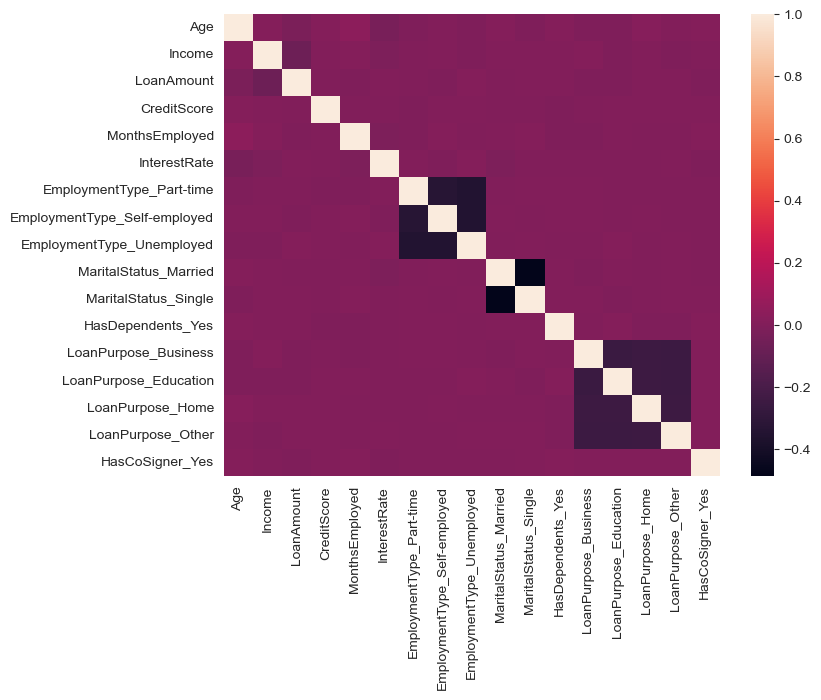

In [265]:
plt.figure(
        figsize=[8,6]
)
sns.heatmap(
        data=final_data.corr(), 
        #cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [266]:
# This is for testing result, ignore for now

final_data_test = test_df.copy()
droping_test = droping
droping_test.remove('Default')
final_data_test.drop(droping_test, axis=1, inplace = True)
for title_test in column_headers:
    if final_data_test[title_test].dtype not in ['int64', 'float64']:
        final_data_test = pd.get_dummies(final_data_test, columns=[title_test],drop_first=True)
final_data_test = (final_data_test).astype('float64')        
final_data_test.info()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           109435 non-null  float64
 1   Income                        109435 non-null  float64
 2   LoanAmount                    109435 non-null  float64
 3   CreditScore                   109435 non-null  float64
 4   MonthsEmployed                109435 non-null  float64
 5   InterestRate                  109435 non-null  float64
 6   EmploymentType_Part-time      109435 non-null  float64
 7   EmploymentType_Self-employed  109435 non-null  float64
 8   EmploymentType_Unemployed     109435 non-null  float64
 9   MaritalStatus_Married         109435 non-null  float64
 10  MaritalStatus_Single          109435 non-null  float64
 11  HasDependents_Yes             109435 non-null  float64
 12  LoanPurpose_Business          109435 non-nul

In [267]:
# Preprocessing final data and X_test for the training
scaler = MinMaxScaler()

final_data = scaler.fit_transform(final_data)
X_test = scaler.transform(X_test)

In [268]:
# Fitting the data test, ignore for now, this is for submiting the assignment
final_data_test = scaler.transform(final_data_test)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

## Prediction 1

In [302]:
model = tf.keras.models.Sequential([
    
    
    tf.keras.layers.Dense(12, activation='relu', name = "L0"),
    tf.keras.layers.Dropout(0.2, name="D0"),
    #tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.01), name = "L1"),
    #tf.keras.layers.Dense(17, activation='relu', name = "L1"),
    #tf.keras.layers.Dropout(0.2, name="D1"),
    #tf.keras.layers.Dense(9, activation='relu', name = "L2"),
    #tf.keras.layers.Dropout(0.2, name="D2"),
    #tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1(0.01),  name = "L3"),
    tf.keras.layers.Dense(4, activation='relu', name = "L3"),
    #tf.keras.layers.Dropout(0.1, name="D3"),
    tf.keras.layers.Dense(1, activation = 'sigmoid', name = "LOut")  
])




model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['binary_accuracy'],
             )
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=15
)

model.fit( 
          final_data,
          y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
         )

Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.5197 - loss: 0.6980 - val_binary_accuracy: 0.6305 - val_loss: 0.6903
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5760 - loss: 0.6843 - val_binary_accuracy: 0.6077 - val_loss: 0.6950
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6255 - loss: 0.6614 - val_binary_accuracy: 0.6902 - val_loss: 0.6671
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6486 - loss: 0.6413 - val_binary_accuracy: 0.6930 - val_loss: 0.6566
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6635 - loss: 0.6275 - val_binary_accuracy: 0.6944 - val_loss: 0.6395
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6680 - loss: 0.6212 - val_binary_accuracy: 0.6957 - val_loss: 0.6254
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6717 - loss: 0.6178 - val_binary_accuracy: 0.6690 - val_loss: 0.6343

<Axes: >

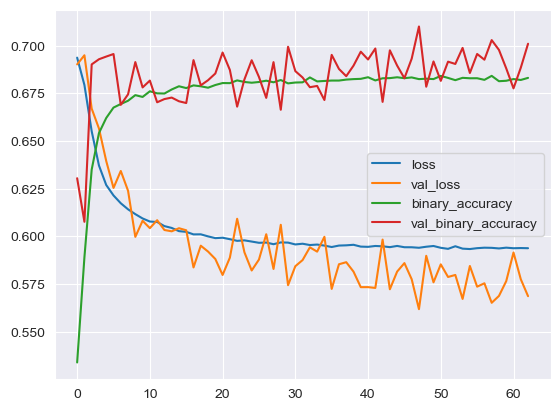

In [303]:
# Displaying values of loss and accuracy
pd.DataFrame(model.history.history)[['loss','val_loss', 'binary_accuracy','val_binary_accuracy']].plot()


### As could be seen, it is definatelly not what it is expected but I have tried so far with multiples values for Regularization L1, L2, L1_L2, Dropout, Layers, Neurons, Data size, Learning rate, Patience and couldn't make it better, I would really appreciate any suggestion to help me improve this training

In [192]:
# Evaluating model with the prediction
 
prediction = model.predict(X_test)
predicted_probability = ( prediction > 0.65).astype("int32")

print(
        confusion_matrix(y_test,predicted_probability), 
        '\n', 
        classification_report(y_test,predicted_probability)
)
print(prediction[:,0])
print(min(prediction))
print(max(prediction))

print("now of pp")
print(predicted_probability[:,0])
print(min(predicted_probability))
print(max(predicted_probability))

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step
[[39939  5217]
 [ 3456  2458]] 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     45156
           1       0.32      0.42      0.36      5914

    accuracy                           0.83     51070
   macro avg       0.62      0.65      0.63     51070
weighted avg       0.85      0.83      0.84     51070

[0.22678345 0.5581377  0.80358565 ... 0.20853089 0.35771468 0.15035693]
[0.05530411]
[0.98172194]
now of pp
[0 0 1 ... 0 0 0]
[0]
[1]
